## CX Calibration with HPO

#### Imports

In [1]:
import sys
import os
import matplotlib.pyplot as plt
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
module_path = os.path.abspath(os.path.join('/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control'))
if module_path not in sys.path:
    sys.path.append(module_path)

from template_configurations import gate_q_env_config
from quantumenvironment import QuantumEnvironment
from hyperparameter_optimization import HyperparameterOptimizer
from gymnasium.wrappers import RescaleAction, ClipAction

import logging
logging.basicConfig(
    level=logging.WARNING,
    format="%(asctime)s INFO %(message)s", # hardcoded INFO level
    datefmt="%Y-%m-%d %H:%M:%S",
    stream=sys.stdout,
)

/Users/lukasvoss/Library/Python/3.9/lib/python/site-packages/qiskit_dynamics/dispatch/backends/jax.py:34: UserWarning: The functionality in the perturbation module of Qiskit Dynamics requires a JAX version <= 0.4.6, due to a bug in JAX versions > 0.4.6. For versions 0.4.4, 0.4.5, and 0.4.6, using the perturbation module functionality requires setting os.environ['JAX_JIT_PJIT_API_MERGE'] = '0' before importing JAX or Dynamics.
  warnings.warn(


Starting Rabi experiment for qubit 0...
Rabi experiment for qubit 0 done.
Starting Drag experiment for qubit 0...
Drag experiments done for qubit 0 done.
Starting Rabi experiment for qubit 1...
Rabi experiment for qubit 1 done.
Starting Drag experiment for qubit 1...
Drag experiments done for qubit 1 done.
All single qubit calibrations are done
Updated Instruction Schedule Map <InstructionScheduleMap(1Q instructions:
  q0: {'measure', 'id', 'tdg', 'sx', 'z', 's', 't', 'h', 'delay', 'rz', 'x', 'reset', 'sdg'}
  q1: {'measure', 'id', 'tdg', 'sx', 'z', 's', 't', 'h', 'delay', 'rz', 'x', 'reset', 'sdg'}
Multi qubit instructions:
  (0, 1): {'cr45p', 'cr45m', 'ecr'}
  (1, 0): {'cr45p', 'cr45m', 'ecr'}
)>


Which gate is to be calibrated?

In [2]:
gate_q_env_config.target

{'register': [0, 1],
 'gate': Instruction(name='cx', num_qubits=2, num_clbits=0, params=[])}

### Perform HPO

Set path to the files specifying the RL agent and where to store the HPO results

In [3]:
current_dir = os.getcwd()

path_agent_config = os.path.join(os.path.dirname(current_dir), 'agent_config.yaml')
path_hpo_config = os.path.join(current_dir, 'config_yamls', 'hpo_config.yaml')
save_results_path = 'hpo_results'

#### Create the QuantumEnvironment, clip and rescale the action space

In [4]:
# Define the original action space
print('Initial loower bounds:', gate_q_env_config.action_space.low)
print('Initial upper bounds:', gate_q_env_config.action_space.high)

q_env = QuantumEnvironment(gate_q_env_config)

# Apply the RescaleAction wrapper
q_env = ClipAction(q_env)
q_env = RescaleAction(q_env, min_action=-1.0, max_action=1.0)

# Confirm the rescale box dimensions
print('Rescaled lower bounds:', q_env.action_space.low)
print('Rescaled upper bounds:', q_env.action_space.high)

Initial loower bounds: [-3.14 -3.14 -3.14 -3.14 -3.14 -3.14 -3.14]
Initial upper bounds: [3.14 3.14 3.14 3.14 3.14 3.14 3.14]
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[ 0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j])
Rescaled lower bounds: [-1. -1. -1. -1. -1. -1. -1.]
Rescaled upper bounds: [1. 1. 1. 1. 1. 1. 1.]


In [5]:
optimizer = HyperparameterOptimizer(
    q_env=q_env,
    path_agent_config=path_agent_config,
    path_hpo_config=path_hpo_config, 
    save_results_path=save_results_path, 
    log_progress=True,
)
best_trial = optimizer.optimize_hyperparameters(num_hpo_trials = 3)

 80%|███████▉  | 150/188 [01:09<00:17,  2.14it/s]

Starting benchmarking...
Starting simulation benchmark...


 80%|████████  | 151/188 [01:09<00:17,  2.11it/s]

Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[ 0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j])
mean tensor([ 0.0460, -0.2155, -0.2226, -0.5148, -0.4876,  0.4954,  0.4647])
sigma tensor([0.0263, 0.0506, 0.0491, 0.0315, 0.0232, 0.0296, 0.0256])
Fidelity: 0.9701424222468645
Average return: 0.987135636143195
DFE Rewards Mean: 0.987135636143195
DFE Rewards standard dev 0.017663136775569164
Returns Mean: 6.6218276
Returns standard dev 4.0682
Advantages Mean: 1.819131
Advantages standard dev 4.0682006
Starting benchmarking...


 81%|████████  | 152/188 [01:10<00:16,  2.12it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j])
mean tensor([ 0.0422, -0.2019, -0.2118, -0.5145, -0.4822,  0.4865,  0.4621])
sigma tensor([0.0266, 0.0594, 0.0543, 0.0329, 0.0224, 0.0359, 0.0268])
Fidelity: 0.958074087200765
Average return: 0.9800539195291862
DFE Rewards Mean: 0.9800539195291862
DFE Rewards standard dev 0.02318079839557184
Returns Mean: 5.986078
Returns standard dev 4.0615826
Advantages Mean: 1.0463399
Advantages standard dev 4.061583
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'YI', 'YZ'],
              coeffs=[ 0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j])


 81%|████████▏ | 153/188 [01:10<00:16,  2.16it/s]

mean tensor([ 0.0339, -0.2120, -0.2253, -0.5294, -0.4998,  0.5041,  0.4896])
sigma tensor([0.0228, 0.0496, 0.0467, 0.0280, 0.0183, 0.0300, 0.0209])
Fidelity: 0.9734587704201713
Average return: 0.9893683097601113
DFE Rewards Mean: 0.9893683097601113
DFE Rewards standard dev 0.015521128404376756
Returns Mean: 6.974314
Returns standard dev 4.1726656
Advantages Mean: 1.6225382
Advantages standard dev 4.1726656
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j])


 82%|████████▏ | 154/188 [01:11<00:18,  1.88it/s]

mean tensor([ 0.0268, -0.2154, -0.2154, -0.5006, -0.4857,  0.4863,  0.4701])
sigma tensor([0.0249, 0.0571, 0.0520, 0.0281, 0.0224, 0.0320, 0.0230])
Fidelity: 0.9682819986110532
Average return: 0.9904759503545183
DFE Rewards Mean: 0.9904759503545183
DFE Rewards standard dev 0.015069071478505995
Returns Mean: 6.97245
Returns standard dev 4.0542893
Advantages Mean: 1.5628211
Advantages standard dev 4.0542893
Starting benchmarking...
Starting simulation benchmark...


 82%|████████▏ | 155/188 [01:12<00:16,  1.99it/s]

Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'XI', 'XZ'],
              coeffs=[ 0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j])
mean tensor([ 0.0283, -0.2267, -0.2302, -0.5025, -0.4947,  0.4931,  0.4936])
sigma tensor([0.0211, 0.0586, 0.0456, 0.0265, 0.0212, 0.0277, 0.0184])
Fidelity: 0.9790286258655391
Average return: 0.9939206793766606
DFE Rewards Mean: 0.9939206793766606
DFE Rewards standard dev 0.012259409379107227
Returns Mean: 7.7887564
Returns standard dev 4.291238
Advantages Mean: 2.008574
Advantages standard dev 4.291238
Starting benchmarking...


 83%|████████▎ | 156/188 [01:12<00:15,  2.06it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XX', 'YZ', 'ZY'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])
mean tensor([ 0.0238, -0.2242, -0.2393, -0.5161, -0.5037,  0.5155,  0.5059])
sigma tensor([0.0185, 0.0560, 0.0406, 0.0245, 0.0177, 0.0215, 0.0166])
Fidelity: 0.9809332032789916
Average return: 0.9785166520637625
DFE Rewards Mean: 0.9785166520637625
DFE Rewards standard dev 0.030044236580873747
Returns Mean: 5.929521
Returns standard dev 3.9088778
Advantages Mean: -0.25771287
Advantages standard dev 3.9088778
Starting benchmarking...


 84%|████████▎ | 157/188 [01:12<00:14,  2.13it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XY', 'YX', 'ZZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])
mean tensor([ 0.0265, -0.2335, -0.2543, -0.5131, -0.5028,  0.5208,  0.5076])
sigma tensor([0.0169, 0.0442, 0.0376, 0.0244, 0.0187, 0.0210, 0.0148])
Fidelity: 0.9864261886110132
Average return: 0.9868609644847964
DFE Rewards Mean: 0.9868609644847964
DFE Rewards standard dev 0.01804666102174576
Returns Mean: 6.51284
Returns standard dev 4.0242734
Advantages Mean: 0.51077515
Advantages standard dev 4.0242734
Starting benchmarking...


 84%|████████▍ | 158/188 [01:13<00:13,  2.18it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XX', 'YY', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j, -0.25+0.j,  0.25+0.j])
mean tensor([ 0.0080, -0.2357, -0.2581, -0.5042, -0.4920,  0.5135,  0.4983])
sigma tensor([0.0205, 0.0430, 0.0355, 0.0251, 0.0208, 0.0258, 0.0188])
Fidelity: 0.9883861402462654
Average return: 0.9876896277084923
DFE Rewards Mean: 0.9876896277084923
DFE Rewards standard dev 0.017859107755548
Returns Mean: 6.6651096
Returns standard dev 4.02977
Advantages Mean: 0.55017513
Advantages standard dev 4.02977
Starting benchmarking...


 85%|████████▍ | 159/188 [01:13<00:13,  2.20it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XX', 'YY', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j,  0.25+0.j, -0.25+0.j])
mean tensor([ 0.0047, -0.2346, -0.2631, -0.5015, -0.4944,  0.5100,  0.4945])
sigma tensor([0.0239, 0.0332, 0.0305, 0.0214, 0.0188, 0.0277, 0.0181])
Fidelity: 0.9908812840978489
Average return: 0.9915275963988591
DFE Rewards Mean: 0.9915275963988591
DFE Rewards standard dev 0.014315060585696532
Returns Mean: 7.3160787
Returns standard dev 4.2315416
Advantages Mean: 0.9707041
Advantages standard dev 4.2315416
Starting benchmarking...


 85%|████████▌ | 160/188 [01:14<00:13,  2.03it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])
mean tensor([ 0.0088, -0.2286, -0.2660, -0.4761, -0.4686,  0.4997,  0.4810])
sigma tensor([0.0224, 0.0380, 0.0333, 0.0264, 0.0224, 0.0354, 0.0214])
Fidelity: 0.9847588157126024
Average return: 0.9931503971387464
DFE Rewards Mean: 0.9931503971387464
DFE Rewards standard dev 0.012652644851621818
Returns Mean: 7.382647
Returns standard dev 4.113081
Advantages Mean: 1.0951933
Advantages standard dev 4.113081
Starting benchmarking...


 86%|████████▌ | 161/188 [01:14<00:12,  2.10it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[ 0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j])
mean tensor([ 0.0082, -0.2282, -0.2725, -0.4858, -0.4747,  0.5060,  0.4920])
sigma tensor([0.0188, 0.0337, 0.0310, 0.0261, 0.0212, 0.0327, 0.0209])
Fidelity: 0.9884499553016355
Average return: 0.9934606372520157
DFE Rewards Mean: 0.9934606372520157
DFE Rewards standard dev 0.012038778578161128
Returns Mean: 7.3656697
Returns standard dev 4.0726914
Advantages Mean: 0.7279198
Advantages standard dev 4.0726914
Starting benchmarking...


 86%|████████▌ | 162/188 [01:15<00:12,  2.15it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])
mean tensor([ 0.0103, -0.2433, -0.2755, -0.4922, -0.4690,  0.5018,  0.4877])
sigma tensor([0.0185, 0.0375, 0.0340, 0.0239, 0.0234, 0.0359, 0.0232])
Fidelity: 0.9859526994600731
Average return: 0.9916247797469232
DFE Rewards Mean: 0.9916247797469232
DFE Rewards standard dev 0.012631627768299503
Returns Mean: 7.056067
Returns standard dev 4.0106277
Advantages Mean: 0.27427426
Advantages standard dev 4.0106277
Starting benchmarking...


 87%|████████▋ | 163/188 [01:15<00:11,  2.17it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IX', 'XI', 'XX'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])
mean tensor([ 0.0113, -0.2449, -0.2898, -0.5083, -0.4987,  0.5119,  0.5051])
sigma tensor([0.0141, 0.0284, 0.0291, 0.0191, 0.0206, 0.0279, 0.0178])
Fidelity: 0.9898724674422474
Average return: 0.9905208289684931
DFE Rewards Mean: 0.9905208289684931
DFE Rewards standard dev 0.015332980826585131
Returns Mean: 7.041809
Returns standard dev 4.0371876
Advantages Mean: -0.24810757
Advantages standard dev 4.0371876
Starting benchmarking...


 87%|████████▋ | 164/188 [01:16<00:10,  2.21it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])
mean tensor([ 0.0045, -0.2249, -0.2607, -0.5012, -0.4777,  0.4653,  0.4820])
sigma tensor([0.0225, 0.0463, 0.0402, 0.0271, 0.0223, 0.0333, 0.0240])
Fidelity: 0.9817168747783939
Average return: 0.9920202104331641
DFE Rewards Mean: 0.9920202104331641
DFE Rewards standard dev 0.013082856528011791
Returns Mean: 7.3138876
Returns standard dev 4.161533
Advantages Mean: 0.4935894
Advantages standard dev 4.161533
Starting benchmarking...


 88%|████████▊ | 165/188 [01:16<00:10,  2.24it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'XI', 'XZ'],
              coeffs=[ 0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j])
mean tensor([ 0.0188, -0.2283, -0.2686, -0.5045, -0.4881,  0.4754,  0.4970])
sigma tensor([0.0199, 0.0417, 0.0377, 0.0221, 0.0184, 0.0280, 0.0183])
Fidelity: 0.9869961546113138
Average return: 0.9933881620114201
DFE Rewards Mean: 0.9933881620114201
DFE Rewards standard dev 0.01144502255625994
Returns Mean: 7.534903
Returns standard dev 4.131664
Advantages Mean: 0.39852184
Advantages standard dev 4.131664
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IY', 'XI', 'XY'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 88%|████████▊ | 166/188 [01:17<00:10,  2.04it/s]

mean tensor([-0.0305, -0.1511, -0.2660, -0.4842, -0.5657,  0.4321,  0.5256])
sigma tensor([0.0258, 0.0392, 0.0381, 0.0209, 0.0168, 0.0231, 0.0182])
Fidelity: 0.956828229999666
Average return: 0.9382214118334641
DFE Rewards Mean: 0.9382214118334641
DFE Rewards standard dev 0.044180495712309815
Returns Mean: 3.5430079
Returns standard dev 2.5385904
Advantages Mean: -3.818838
Advantages standard dev 2.5385904
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 89%|████████▉ | 167/188 [01:17<00:09,  2.12it/s]

mean tensor([-0.0285, -0.1560, -0.2570, -0.4689, -0.5265,  0.4036,  0.4827])
sigma tensor([0.0327, 0.0560, 0.0616, 0.0321, 0.0239, 0.0380, 0.0266])
Fidelity: 0.9421436288086051
Average return: 0.9864544391664657
DFE Rewards Mean: 0.9864544391664657
DFE Rewards standard dev 0.017614538247373874
Returns Mean: 6.2515116
Returns standard dev 3.8292625
Advantages Mean: -0.366964
Advantages standard dev 3.8292625
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 89%|████████▉ | 168/188 [01:17<00:09,  2.18it/s]

mean tensor([-0.0271, -0.1607, -0.2586, -0.4720, -0.5236,  0.4105,  0.4790])
sigma tensor([0.0282, 0.0565, 0.0615, 0.0288, 0.0225, 0.0373, 0.0247])
Fidelity: 0.9437761821140157
Average return: 0.9903986666978771
DFE Rewards Mean: 0.9903986666978771
DFE Rewards standard dev 0.014295749624958099
Returns Mean: 6.9301004
Returns standard dev 4.0515575
Advantages Mean: 0.5091197
Advantages standard dev 4.0515575
Starting benchmarking...
Starting simulation benchmark...


 90%|████████▉ | 169/188 [01:18<00:08,  2.22it/s]

Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])
mean tensor([-0.0167, -0.1654, -0.2609, -0.4726, -0.5180,  0.4018,  0.4694])
sigma tensor([0.0259, 0.0582, 0.0655, 0.0257, 0.0225, 0.0369, 0.0260])
Fidelity: 0.9449172740097566
Average return: 0.9919752963424527
DFE Rewards Mean: 0.9919752963424527
DFE Rewards standard dev 0.012674038988961
Returns Mean: 7.157159
Returns standard dev 4.0278683
Advantages Mean: 0.5059858
Advantages standard dev 4.0278683
Starting benchmarking...


 90%|█████████ | 170/188 [01:18<00:08,  2.24it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'XI', 'XZ'],
              coeffs=[ 0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j])
mean tensor([-0.0053, -0.1748, -0.2691, -0.4804, -0.5208,  0.4127,  0.4822])
sigma tensor([0.0231, 0.0514, 0.0573, 0.0215, 0.0200, 0.0380, 0.0212])
Fidelity: 0.9590175672369725
Average return: 0.9741253554619697
DFE Rewards Mean: 0.9741253554619697
DFE Rewards standard dev 0.028748637990337993
Returns Mean: 5.5914865
Returns standard dev 3.9329922
Advantages Mean: -1.3997803
Advantages standard dev 3.9329922
Starting benchmarking...


 91%|█████████ | 171/188 [01:19<00:07,  2.24it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XX', 'YY', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j, -0.25+0.j,  0.25+0.j])
mean tensor([ 0.0043, -0.1717, -0.2639, -0.4846, -0.5114,  0.4283,  0.4838])
sigma tensor([0.0215, 0.0475, 0.0546, 0.0211, 0.0174, 0.0351, 0.0229])
Fidelity: 0.9664766043286336
Average return: 0.9747937415364619
DFE Rewards Mean: 0.9747937415364619
DFE Rewards standard dev 0.032694768643808055
Returns Mean: 5.6416826
Returns standard dev 3.839433
Advantages Mean: -1.1169744
Advantages standard dev 3.839433
Starting benchmarking...


 91%|█████████▏| 172/188 [01:19<00:07,  2.25it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'YI', 'YZ'],
              coeffs=[ 0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j])
mean tensor([ 0.0015, -0.1786, -0.2723, -0.4861, -0.5085,  0.4216,  0.4854])
sigma tensor([0.0243, 0.0457, 0.0477, 0.0202, 0.0182, 0.0346, 0.0217])
Fidelity: 0.9688207217611443
Average return: 0.9762409927288307
DFE Rewards Mean: 0.9762409927288307
DFE Rewards standard dev 0.024026534368676532
Returns Mean: 5.3218236
Returns standard dev 3.566899
Advantages Mean: -1.2079407
Advantages standard dev 3.566899
Starting benchmarking...


 92%|█████████▏| 173/188 [01:20<00:07,  2.05it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j])
mean tensor([ 0.0023, -0.1739, -0.2569, -0.4873, -0.5180,  0.4458,  0.4830])
sigma tensor([0.0252, 0.0480, 0.0489, 0.0197, 0.0232, 0.0371, 0.0222])
Fidelity: 0.967844447924537
Average return: 0.9944490030513461
DFE Rewards Mean: 0.9944490030513461
DFE Rewards standard dev 0.010499433334330881
Returns Mean: 7.6385875
Returns standard dev 4.0861845
Advantages Mean: 1.3684545
Advantages standard dev 4.0861845
Starting benchmarking...


 93%|█████████▎| 174/188 [01:20<00:06,  2.12it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'YI', 'YZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])
mean tensor([-0.0102, -0.1778, -0.2648, -0.4955, -0.5117,  0.4418,  0.4863])
sigma tensor([0.0222, 0.0504, 0.0445, 0.0196, 0.0204, 0.0351, 0.0212])
Fidelity: 0.9721818706990144
Average return: 0.985667186285484
DFE Rewards Mean: 0.985667186285484
DFE Rewards standard dev 0.02004357677829617
Returns Mean: 6.5801635
Returns standard dev 4.1788244
Advantages Mean: 0.05052751
Advantages standard dev 4.1788244
Starting benchmarking...


 93%|█████████▎| 175/188 [01:21<00:05,  2.17it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[ 0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j])
mean tensor([-0.0094, -0.1825, -0.2679, -0.4976, -0.5100,  0.4537,  0.4823])
sigma tensor([0.0224, 0.0478, 0.0439, 0.0195, 0.0189, 0.0339, 0.0193])
Fidelity: 0.9755302192346084
Average return: 0.994161401294357
DFE Rewards Mean: 0.994161401294357
DFE Rewards standard dev 0.010976490996088084
Returns Mean: 7.7395263
Returns standard dev 4.167888
Advantages Mean: 1.2271881
Advantages standard dev 4.167888
Starting benchmarking...


 94%|█████████▎| 176/188 [01:21<00:05,  2.21it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XX', 'YY', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j, -0.25+0.j,  0.25+0.j])
mean tensor([-0.0042, -0.1817, -0.2806, -0.4976, -0.5106,  0.4584,  0.4858])
sigma tensor([0.0205, 0.0468, 0.0403, 0.0172, 0.0174, 0.0343, 0.0176])
Fidelity: 0.9796639529133114
Average return: 0.9819497167404793
DFE Rewards Mean: 0.9819497167404793
DFE Rewards standard dev 0.0282601792185624
Returns Mean: 6.3125834
Returns standard dev 4.058179
Advantages Mean: -0.4573675
Advantages standard dev 4.058179
Starting benchmarking...


 94%|█████████▍| 177/188 [01:22<00:04,  2.23it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XY', 'YZ', 'ZX'],
              coeffs=[ 0.25+0.j,  0.25+0.j,  0.25+0.j, -0.25+0.j])
mean tensor([-0.0012, -0.1941, -0.2886, -0.5179, -0.5159,  0.4682,  0.4898])
sigma tensor([0.0208, 0.0366, 0.0288, 0.0161, 0.0158, 0.0341, 0.0158])
Fidelity: 0.9878332744915215
Average return: 0.9872615613659497
DFE Rewards Mean: 0.9872615613659497
DFE Rewards standard dev 0.017778442151559708
Returns Mean: 6.621614
Returns standard dev 4.113961
Advantages Mean: -0.01764274
Advantages standard dev 4.113961
Starting benchmarking...


 95%|█████████▍| 178/188 [01:22<00:04,  2.24it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])
mean tensor([ 0.0471, -0.1769, -0.2801, -0.5114, -0.4669,  0.4643,  0.4894])
sigma tensor([0.0242, 0.0470, 0.0363, 0.0234, 0.0257, 0.0468, 0.0243])
Fidelity: 0.9721483626420562
Average return: 0.9855096609904355
DFE Rewards Mean: 0.9855096609904355
DFE Rewards standard dev 0.018504828121904175
Returns Mean: 6.4230127
Returns standard dev 4.0722117
Advantages Mean: 0.1720219
Advantages standard dev 4.0722117
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IX', 'XI', 'XX'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 95%|█████████▌| 179/188 [01:23<00:04,  2.06it/s]

mean tensor([ 0.0329, -0.1918, -0.2859, -0.5105, -0.4783,  0.4780,  0.4965])
sigma tensor([0.0252, 0.0413, 0.0326, 0.0194, 0.0222, 0.0442, 0.0210])
Fidelity: 0.98218111654792
Average return: 0.9823734930369455
DFE Rewards Mean: 0.9823734930369455
DFE Rewards standard dev 0.022713552058576388
Returns Mean: 6.0740156
Returns standard dev 3.9386985
Advantages Mean: -0.4038321
Advantages standard dev 3.9386983
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'YI', 'YZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])


 96%|█████████▌| 180/188 [01:23<00:03,  2.13it/s]

mean tensor([ 0.0301, -0.1843, -0.2842, -0.5048, -0.4783,  0.4746,  0.4966])
sigma tensor([0.0251, 0.0378, 0.0329, 0.0208, 0.0266, 0.0375, 0.0229])
Fidelity: 0.981230097351277
Average return: 0.9874690922150651
DFE Rewards Mean: 0.9874690922150651
DFE Rewards standard dev 0.01650320460446622
Returns Mean: 6.490559
Returns standard dev 3.9770741
Advantages Mean: 0.23091981
Advantages standard dev 3.9770741
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j])


 96%|█████████▋| 181/188 [01:23<00:03,  2.16it/s]

mean tensor([ 0.0298, -0.1844, -0.2815, -0.4968, -0.4777,  0.4815,  0.4921])
sigma tensor([0.0258, 0.0406, 0.0315, 0.0179, 0.0319, 0.0321, 0.0228])
Fidelity: 0.9815452573808412
Average return: 0.9898476401089361
DFE Rewards Mean: 0.9898476401089361
DFE Rewards standard dev 0.015421748541640195
Returns Mean: 6.9977107
Returns standard dev 4.1191173
Advantages Mean: 0.6020337
Advantages standard dev 4.1191173
Starting benchmarking...
Starting simulation benchmark...


 97%|█████████▋| 182/188 [01:24<00:02,  2.20it/s]

Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XX', 'YY', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j, -0.25+0.j,  0.25+0.j])
mean tensor([ 0.0174, -0.1932, -0.2859, -0.4983, -0.4884,  0.4897,  0.4969])
sigma tensor([0.0244, 0.0370, 0.0277, 0.0168, 0.0260, 0.0318, 0.0193])
Fidelity: 0.9890026477373707
Average return: 0.9898502679852482
DFE Rewards Mean: 0.9898502679852482
DFE Rewards standard dev 0.016181952833090936
Returns Mean: 6.8714213
Returns standard dev 4.0731845
Advantages Mean: 0.269098
Advantages standard dev 4.073185
Starting benchmarking...


 97%|█████████▋| 183/188 [01:24<00:02,  2.22it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'YI', 'YZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])
mean tensor([ 0.0095, -0.2151, -0.2870, -0.4954, -0.4842,  0.4847,  0.4940])
sigma tensor([0.0241, 0.0339, 0.0267, 0.0174, 0.0260, 0.0349, 0.0196])
Fidelity: 0.9878753219625068
Average return: 0.9925733724327525
DFE Rewards Mean: 0.9925733724327525
DFE Rewards standard dev 0.012406507053919302
Returns Mean: 7.194709
Returns standard dev 4.002486
Advantages Mean: 0.42361322
Advantages standard dev 4.002486
Starting benchmarking...


 98%|█████████▊| 184/188 [01:25<00:01,  2.23it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XY', 'YX', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j])
mean tensor([ 0.0106, -0.2263, -0.2816, -0.5049, -0.4864,  0.4918,  0.4964])
sigma tensor([0.0204, 0.0272, 0.0238, 0.0175, 0.0244, 0.0246, 0.0183])
Fidelity: 0.9923820584274244
Average return: 0.9911902089789308
DFE Rewards Mean: 0.9911902089789308
DFE Rewards standard dev 0.01362609152435081
Returns Mean: 6.9696193
Returns standard dev 3.9697998
Advantages Mean: -0.021862486
Advantages standard dev 3.9697998
Starting benchmarking...


 98%|█████████▊| 185/188 [01:25<00:01,  2.04it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'XX', 'YY', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j, -0.25+0.j,  0.25+0.j])
mean tensor([-0.0070, -0.2228, -0.2779, -0.5028, -0.4789,  0.4861,  0.4961])
sigma tensor([0.0245, 0.0279, 0.0278, 0.0195, 0.0268, 0.0321, 0.0215])
Fidelity: 0.9889404188982654
Average return: 0.9899145808713357
DFE Rewards Mean: 0.9899145808713357
DFE Rewards standard dev 0.014385584029656756
Returns Mean: 6.9101977
Returns standard dev 4.0797625
Advantages Mean: 0.111877635
Advantages standard dev 4.0797625
Starting benchmarking...


 99%|█████████▉| 186/188 [01:26<00:00,  2.11it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'YI', 'YZ'],
              coeffs=[0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])
mean tensor([-0.0073, -0.2236, -0.2741, -0.5029, -0.4789,  0.4869,  0.4966])
sigma tensor([0.0240, 0.0278, 0.0281, 0.0201, 0.0256, 0.0328, 0.0184])
Fidelity: 0.9896254136657168
Average return: 0.993474219064048
DFE Rewards Mean: 0.993474219064048
DFE Rewards standard dev 0.011655763617960366
Returns Mean: 7.4885845
Returns standard dev 4.0741987
Advantages Mean: 0.6116389
Advantages standard dev 4.0741987
Starting benchmarking...


 99%|█████████▉| 187/188 [01:26<00:00,  2.15it/s]

Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[ 0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j])
mean tensor([-0.0105, -0.2289, -0.2747, -0.4972, -0.4795,  0.4984,  0.5004])
sigma tensor([0.0188, 0.0269, 0.0304, 0.0200, 0.0256, 0.0278, 0.0182])
Fidelity: 0.9908795111355688
Average return: 0.9941001555036173
DFE Rewards Mean: 0.9941001555036173
DFE Rewards standard dev 0.01145188558430383
Returns Mean: 7.908254
Returns standard dev 4.2854447
Advantages Mean: 0.7930809
Advantages standard dev 4.2854443
Starting benchmarking...
Starting simulation benchmark...
Finished simulation benchmark
Finished benchmarking
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j])


100%|██████████| 188/188 [01:27<00:00,  2.16it/s]
[I 2024-01-28 15:43:48,235] Trial 2 finished with value: 0.9664766043286336 and parameters: {'N_UPDATES': 188, 'N_EPOCHS': 8, 'MINIBATCH_SIZE': 48, 'BATCHSIZE_MULTIPLIER': 10, 'LR': 0.0020703628225043056, 'GAMMA': 0.991336754919889, 'GAE_LAMBDA': 0.9414383407218304, 'ENT_COEF': 0.0006251511179785722, 'V_COEF': 0.43495827468820775, 'GRADIENT_CLIP': 0.6310592859932534, 'CLIP_VALUE_COEF': 0.24286097142900762, 'CLIP_RATIO': 0.28082490235933044}. Best is trial 0 with value: 0.9740576599641115.


mean tensor([-0.0146, -0.2204, -0.2731, -0.4924, -0.4790,  0.4980,  0.4982])
sigma tensor([0.0192, 0.0307, 0.0314, 0.0205, 0.0243, 0.0304, 0.0173])
Fidelity: 0.9893660697135612
Average return: 0.9942416251262088
DFE Rewards Mean: 0.9942416251262088
DFE Rewards standard dev 0.010501109817590766
Returns Mean: 7.6864853
Returns standard dev 4.113536
Advantages Mean: 0.368153
Advantages standard dev 4.113536
2024-01-28 15:43:48 INFO ---------------- FINISHED HPO ----------------
2024-01-28 15:43:48 INFO HPO completed in 480.09 seconds.
2024-01-28 15:43:48 INFO Best trial:
2024-01-28 15:43:48 INFO -------------------------
2024-01-28 15:43:48 INFO   Fidelity: 0.9740576599641115
2024-01-28 15:43:48 INFO   Hyperparameters: 
2024-01-28 15:43:48 INFO     N_UPDATES: 271
2024-01-28 15:43:48 INFO     N_EPOCHS: 16
2024-01-28 15:43:48 INFO     MINIBATCH_SIZE: 64
2024-01-28 15:43:48 INFO     BATCHSIZE_MULTIPLIER: 11
2024-01-28 15:43:48 INFO     LR: 0.0009456549641683827
2024-01-28 15:43:48 INFO     G

#### Quick Summary of HPO Task

In [6]:
optimizer.target_gate

{'target_gate': Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]),
 'target_register': [0, 1]}

In [7]:
optimizer.hyperparams

['N_UPDATES',
 'N_EPOCHS',
 'MINIBATCH_SIZE',
 'BATCHSIZE_MULTIPLIER',
 'LR',
 'GAMMA',
 'GAE_LAMBDA',
 'ENT_COEF',
 'V_COEF',
 'GRADIENT_CLIP',
 'CLIP_VALUE_COEF',
 'CLIP_RATIO',
 'BATCHSIZE']

In [8]:
len(best_trial['fidelity_history'])

270

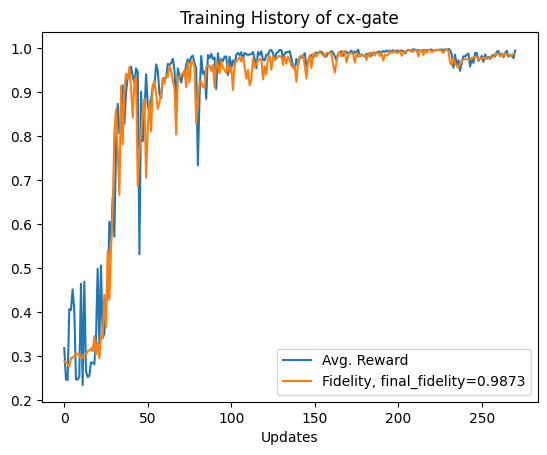

In [17]:
plt.plot(best_trial['avg_reward'], label='Avg. Reward')
plt.plot(best_trial['fidelity_history'], label=f'Fidelity, final_fidelity={round(best_trial["fidelity_history"][-1], 4)}')
plt.xlabel('Updates')
plt.title(f'Training History of {gate_q_env_config.target["gate"].name}-gate')
plt.legend()